# L-System fractals

[Wikipedia](https://en.wikipedia.org/wiki/L-system)

In [1]:
from math import radians, cos, sin, floor, ceil
from IPython.display import display, SVG

In [2]:
class System(object):
    def __init__(self, name, seed, direction, angle, rules):
        self.name = name
        self.seed = seed
        self.direction = direction
        self.angle = angle
        self.rules = rules
        self.level = 0
        self.instructions = ''
        self.width = 0
        self.height = 0
        self.x_ini = 0
        self.y_ini = 0
        self.segment_length = 0
    
    def draw(self, level, size, name):
        seed = self.seed
        self.level = level
        for i in range(1,level+1):
            instructions = ''
            for i in range(len(seed)):
                if seed[i] in self.rules:
                    instructions = instructions + self.rules[seed[i]]
                else:
                    instructions = instructions + seed[i]
            seed = instructions
            if len(instructions) > 10240000:
                self.level = i
                break
        self.instructions = instructions
        self.dimensions(size, name)
    
    def dimensions(self, size, name):
        self.segment_length = 100
        if self.level > 0:
            self.width = 0
            self.height = 0
            self.x_ini = 0
            self.y_ini = 0
            for i in range(2):
                x_max = 0
                x_min = 0
                y_max = 0
                y_min = 0
                x = 0
                y = 0
                bkpx = []
                bkpy = []
                bkpa = []
                if self.segment_length > 1:
                    a = self.direction
                    for char in self.instructions:
                        if char == 'F' or char == 'G':
                            x += self.segment_length*cos(radians(a))
                            y += self.segment_length*sin(radians(a))
                            x_min = x if x < x_min else x_min
                            x_max = x if x > x_max else x_max
                            y_min = y if y < y_min else y_min
                            y_max = y if y > y_max else y_max
                        elif char == '+':
                            a += self.angle
                            a = a-360 if a > 360 else a
                        elif char == '-':
                            a -= self.angle
                            a = a+360 if a < 0 else a
                        elif char == '[':
                            bkpx.append(x)
                            bkpy.append(y)
                            bkpa.append(a)
                        elif char == ']':
                            x = bkpx.pop(-1)
                            y = bkpy.pop(-1)
                            a = bkpa.pop(-1)
                    if i == 0:
                        f1 = (size - 40)/(x_max - x_min)
                        f2 = (size - 40)/(y_max - y_min)
                        f = f2 if f1 > f2 else f1
                        self.segment_length = floor(self.segment_length*f)
            if self.segment_length < 2:
                self.instructions = ''
                self.level = 0
                print('Error: segment length less than 1 pixel, try a smaller level.')
            else:
                self.width = floor(x_max - x_min + 40)
                self.height = floor(y_max - y_min + 40)
                self.x_ini = floor(20 - x_min)
                self.y_ini = floor(y_max + 20)
                self.svg(name)
        else:
            print('Error: call expand(level,width).')
    
    def color(self, i):
        colors = ''
        i = i % 1530
        if i < 256:
            colors = colors + '255,'
            colors = colors + f'{i},'
            colors = colors + '0'
        elif i < 511:
            colors = colors + f'{510 - i},'
            colors = colors + '255,'
            colors = colors + '0'
        elif i < 766:
            colors = colors + '0,'
            colors = colors + '255,'
            colors = colors + f'{i - 510}'
        elif i < 1021:
            colors = colors + '0,'
            colors = colors + f'{1020 - i},'
            colors = colors + '255'
        elif i < 1276:
            colors = colors + f'{i - 1020},'
            colors = colors + '0,'
            colors = colors + '255'
        elif i < 1531:
            colors = colors + '255,'
            colors = colors + '0,'
            colors = colors + f'{1530 - i}'
        return colors
    
    def svg(self, name):
        bkpx = []
        bkpy = []
        bkpa = []
        a = self.direction
        x = self.x_ini
        y = self.y_ini
        color_ct = 0
        if self.segment_length > 1:
            with open(name, 'w') as f:
                f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
                f.write(f'<svg height="{self.height}" width="{self.width}" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n')
                a = self.direction
                for char in self.instructions:
                    if char == 'F' or char == 'G':
                        xi = x
                        yi = y
                        x += self.segment_length*cos(radians(a))
                        y -= self.segment_length*sin(radians(a))
                        f.write(f'<line x1="{ceil(xi)}" y1="{ceil(yi)}" x2="{ceil(x)}" y2="{ceil(y)}" style="stroke:rgb({self.color(color_ct)});stroke-width:1" />\n')
                        color_ct += 1
                    elif char == '+':
                        a += self.angle
                        a = a-360 if a > 360 else a
                    elif char == '-':
                        a -= self.angle
                        a = a+360 if a < 0 else a
                    elif char == '[':
                        bkpx.append(x)
                        bkpy.append(y)
                        bkpa.append(a)
                    elif char == ']':
                        x = bkpx.pop(-1)
                        y = bkpy.pop(-1)
                        a = bkpa.pop(-1)
                f.write('</svg>')

In [3]:
dragon = System("Dragon Curve", "FX", 90, 90, {"X":"X-YF-", "Y":"+FX+Y"})
gosper = System("Gosper Curve", "F", 0, 60, {"F":"F-G--G+F++FF+G-", "G":"+F-GG--G-F++F+G"})
dekkings = System("Dekkings Church", "WXYZ", 0, 90, {"F":"A", "W":"FW+F-ZFW-F+X", "Z":"++F--Y-F+X++F--Y-F+X", "Y":"++F--Y+F-Z", "X":"FW+F-Z"})
cesaro = System("Cesaro Curve", "F", 0, 85, {"F":"F+F--F+F"})
plant = System("Plant", "X", 60, 25, {"X":"F+[[X]-X]-F[-FX]+X", "F":"FF"})
hilbert = System("Hilbert Curve", "X", 90, 90, {"X":"+YF-XFX-FY+", "Y":"-XF+YFY+FX-"})
koch = System("Koch Curve", "F--F--F", 0, 60, {"F":"F+F--F+F"})
moore = System("Moore Curve", "XFX+F+XFX", 90, 90, {"X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+"})
pentigree = System("Pentigree", "F", 60, 36, {"F":"+F++F----F--F++F++F-"})
pythagoras = System("Pythagoras Tree", "F", 90, 45, {"G":"GG", "F":"G[+F]-F"})
qgosper = System("Quadratic Gosper Curve", "-F", 90, 90, {"G":"GG-F-F+G+G-F-FG+F+GGF-G+F+GG+F-GF-F-G+G+FF-", "F":"+GG-F-F+G+GF+G-FF-G-F+GFF-G-FG+G+F-F-G+G+FF"})
qkochc = System("Quadratic Koch Curve", "F", 0, 90, {"F":"F+F-F-F+F"})
qkochi = System("Quadratic Koch Island", "F-F-F-F", 0, 90, {"F":"F+FF-FF-F-F+F+FF-F-F+F+FF+FF-F"})
sierpinski = System("Sierpinski Triangle", "F-G-G", 60, 120, {"G":"GG", "F":"F-G+F+G-F"})
sierpinski2 = System("Sierpinski Triangle V2", "F", 0, 60, {"G":"-F+G+F-", "F":"+G-F-G+"})
xborder = System("XBorder", "XYXYXYX+XYXYXYX+XYXYXYX+XYXYXYX", 0, 90, {"F":"A", "X":"FX+FX+FXFY-FY-", "Y":"+FX+FXFY-FY-FY"})

In [4]:
dragon.draw(level=13, size=600, name='fractals/dragon.svg')

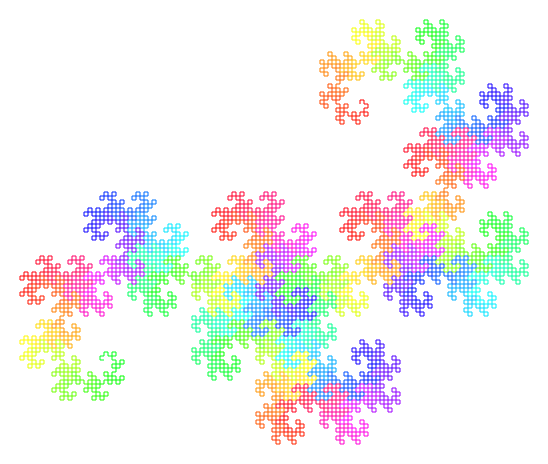

In [5]:
display(SVG(filename='fractals/dragon.svg'))

In [6]:
gosper.draw(level=4, size=600, name='fractals/gosper.svg')

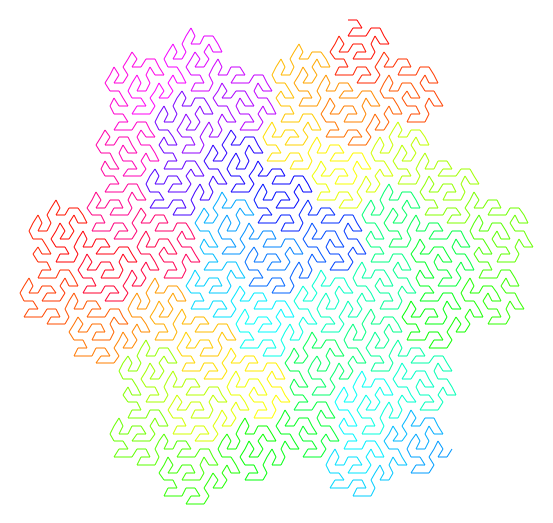

In [7]:
display(SVG(filename='fractals/gosper.svg'))

In [8]:
dekkings.draw(level=7, size=600, name='fractals/dekkings.svg')

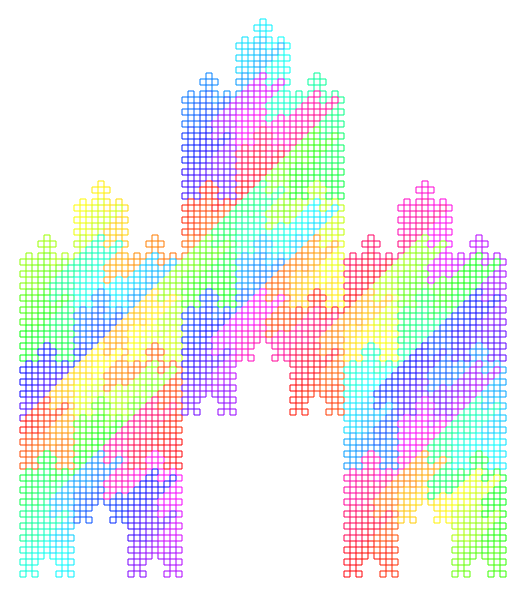

In [9]:
display(SVG(filename='fractals/dekkings.svg'))

In [10]:
cesaro.draw(level=6, size=600, name='fractals/cesaro.svg')

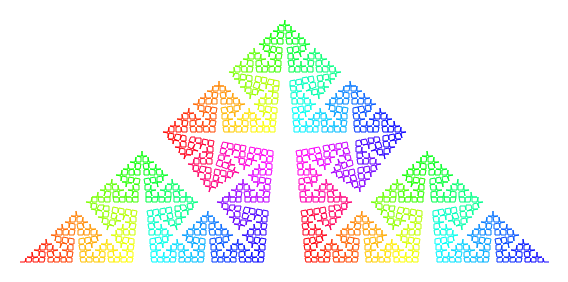

In [11]:
display(SVG(filename='fractals/cesaro.svg'))

In [12]:
plant.draw(level=5, size=600, name='fractals/plant.svg')

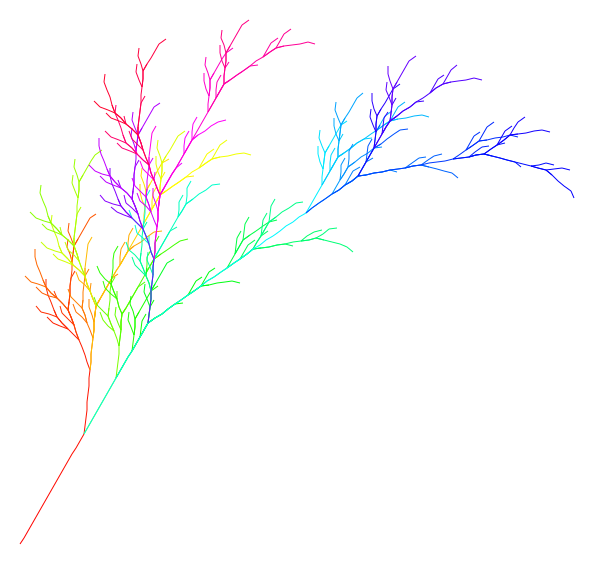

In [13]:
display(SVG(filename='fractals/plant.svg'))

In [14]:
sierpinski.draw(level=6, size=600, name='fractals/sierpinski.svg')

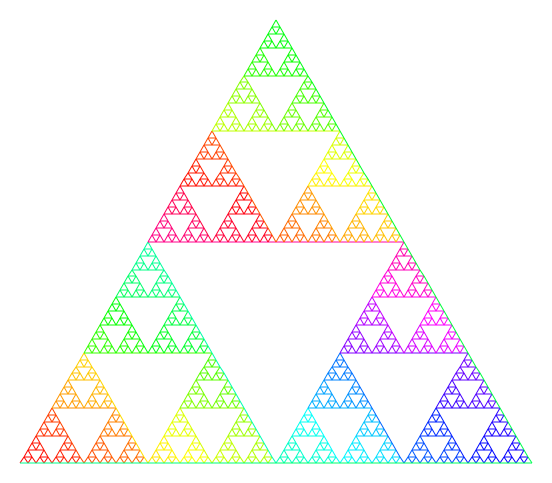

In [15]:
display(SVG(filename='fractals/sierpinski.svg'))